In [2]:
import pandas as pd

# Load the dataset from CSV file
df = pd.read_csv("./train.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check the column names--> since there are no column names, it will display the first row. 
print("\nColumn names:")
print(df.columns)


First few rows of the dataset:
  Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   
2  PID0x4a82          6.0                    Yes                    No   
3  PID0x4ac8         12.0                    Yes                    No   
4  PID0x1bf7         11.0                    Yes                    No   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   
2            No            No                4.893297           Kimberly   
3           Yes            No                4.705280            Jeffery   
4           NaN           Yes                4.720703            Johanna   

  Family Name Father's name  ...  Birth defects  \
0         NaN   

Going to omit patient ID, patient name, family name, mother's name, mother's age, father's age, institute name, institute location, status, parental consent, place of birth

In [3]:
columns_to_remove = ['Patient Id', 'Patient First Name', 'Family Name', "Father's name", "Mother's age", "Father's age",
                     'Institute Name', 'Location of Institute', 'Status', 'Parental consent', 'Place of birth']

df = df.drop(columns=columns_to_remove)

print("First few rows of the dataset:")
print(df.head())

# Check the column names--> since there are no column names, it will display the first row. 
print("\nColumn names:")
print(df.columns)


First few rows of the dataset:
   Patient Age Genes in mother's side Inherited from father Maternal gene  \
0          2.0                    Yes                    No           Yes   
1          4.0                    Yes                   Yes            No   
2          6.0                    Yes                    No            No   
3         12.0                    Yes                    No           Yes   
4         11.0                    Yes                    No           NaN   

  Paternal gene  Blood cell count (mcL) Respiratory Rate (breaths/min)  \
0            No                4.760603                 Normal (30-60)   
1            No                4.910669                      Tachypnea   
2            No                4.893297                 Normal (30-60)   
3            No                4.705280                      Tachypnea   
4           Yes                4.720703                      Tachypnea   

  Heart Rate (rates/min  Test 1  Test 2  ...  Birth defects  

In [4]:
#count rows of missing data for each column
missing_number=df.isnull().sum().sort_values(ascending=False)
#Calculate percentage of null value
missing_percentage=missing_number/len(df)
missing_info=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing number','missing percentage'])
missing_info.head(20)

,missing number,missing percentage
Maternal gene,2810,0.127247
Symptom 2,2222,0.100620
H/O substance abuse,2195,0.099398
Gender,2173,0.098401
History of anomalies in previous pregnancies,2172,0.098356
Test 5,2170,0.098266
Disorder Subclass,2168,0.098175
Follow-up,2166,0.098084
No. of previous abortion,2162,0.097903
Symptom 1,2155,0.097586


In [10]:
#working on the numeric data
numerics = ['int64', 'float64']
df_num = df.select_dtypes(include=numerics)
print(df_num.head())
print("\nnumber Column names:")
print(df_num.columns)

#fill out the num variables with the mean of each column
for num_var in df_num.columns:
    df_num[num_var].fillna(df_num[num_var].mean(),inplace=True)

#count rows of missing data for each column
missing_number=df_num.isnull().sum().sort_values(ascending=False)
#Calculate percentage of null value
missing_percentage=missing_number/len(df_num)
missing_info=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing number','missing percentage'])
missing_info.head(20)

   Patient Age  Blood cell count (mcL)  Test 1  Test 2  Test 3  Test 4  \
0          2.0                4.760603     0.0     0.0     0.0     1.0   
1          4.0                4.910669     0.0     0.0     0.0     1.0   
2          6.0                4.893297     0.0     0.0     0.0     1.0   
3         12.0                4.705280     0.0     0.0     0.0     1.0   
4         11.0                4.720703     0.0     0.0     0.0     1.0   

   Test 5  No. of previous abortion  \
0     0.0                  2.003062   
1     0.0                  2.003062   
2     0.0                  4.000000   
3     0.0                  1.000000   
4     0.0                  4.000000   

   White Blood cell count (thousand per microliter)  Symptom 1  Symptom 2  \
0                                          9.857562        1.0   1.000000   
1                                          5.522560        1.0   0.551886   
2                                          7.486224        0.0   1.000000   
3           

,missing number,missing percentage
Patient Age,0,0.0
Blood cell count (mcL),0,0.0
Test 1,0,0.0
Test 2,0,0.0
Test 3,0,0.0
Test 4,0,0.0
Test 5,0,0.0
No. of previous abortion,0,0.0
White Blood cell count (thousand per microliter),0,0.0
Symptom 1,0,0.0


In [12]:
df_cat= df.select_dtypes(include='object')
print(df_cat.head())
print("\nnon number Column names:")
print(df_cat.columns)

#null variables replaced with mode
for cat_var in df_cat.columns:
    df_cat[cat_var].fillna(df_cat[cat_var].mode()[0],inplace=True)

#count rows of missing data for each column
missing_number=df_cat.isnull().sum().sort_values(ascending=False)
#Calculate percentage of null value
missing_percentage=missing_number/len(df_cat)
missing_info=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing number','missing percentage'])
missing_info.head(20)

  Genes in mother's side Inherited from father Maternal gene Paternal gene  \
0                    Yes                    No           Yes            No   
1                    Yes                   Yes            No            No   
2                    Yes                    No            No            No   
3                    Yes                    No           Yes            No   
4                    Yes                    No           NaN           Yes   

  Respiratory Rate (breaths/min) Heart Rate (rates/min Follow-up Gender  \
0                 Normal (30-60)                Normal      High    NaN   
1                      Tachypnea                Normal      High    NaN   
2                 Normal (30-60)           Tachycardia       Low    NaN   
3                      Tachypnea                Normal      High   Male   
4                      Tachypnea           Tachycardia       Low   Male   

  Birth asphyxia Autopsy shows birth defect (if applicable)  \
0            NaN 

,missing number,missing percentage
Genes in mother's side,0,0.0
Inherited from father,0,0.0
Genetic Disorder,0,0.0
Blood test result,0,0.0
Birth defects,0,0.0
History of anomalies in previous pregnancies,0,0.0
Assisted conception IVF/ART,0,0.0
H/O substance abuse,0,0.0
H/O radiation exposure (x-ray),0,0.0
H/O serious maternal illness,0,0.0


In [13]:
df_num.describe()

,Patient Age,Blood cell count (mcL),Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,22083.000000,22083.000000,22083.0,22083.0,22083.0,22083.0,22083.0,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000
mean,6.974148,4.898871,0.0,0.0,0.0,1.0,0.0,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
std,4.177576,0.199663,0.0,0.0,0.0,0.0,0.0,1.341020,2.521039,0.466792,0.471629,0.474381,0.475483,0.473632
min,0.000000,4.092727,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763109,0.0,0.0,0.0,1.0,0.0,1.000000,5.653911,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.974148,4.899399,0.0,0.0,0.0,1.0,0.0,2.000000,7.486224,1.000000,0.551886,0.536233,0.497747,0.461917
75%,10.000000,5.033830,0.0,0.0,0.0,1.0,0.0,3.000000,9.279380,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


c:\Users\naysa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\naysa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\naysa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

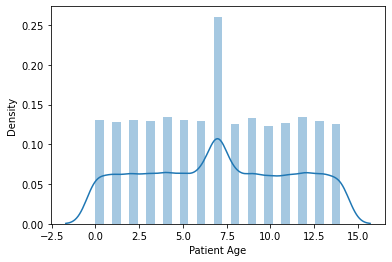

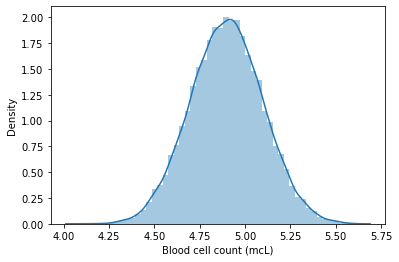

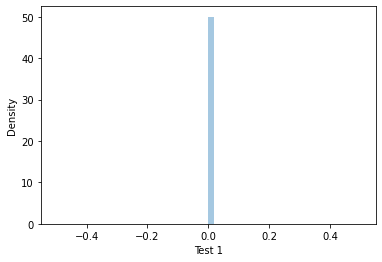

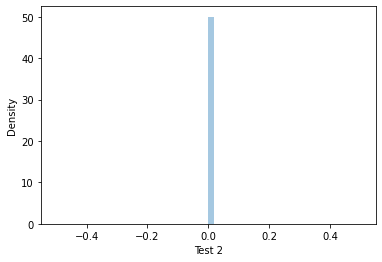

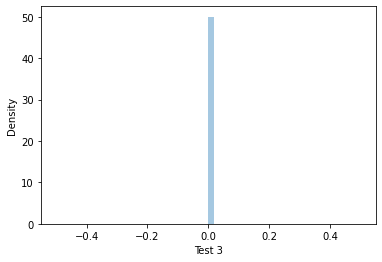

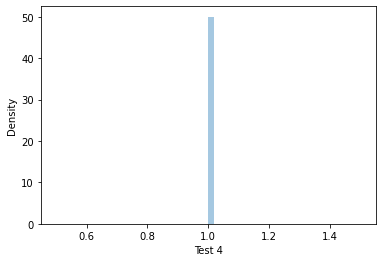

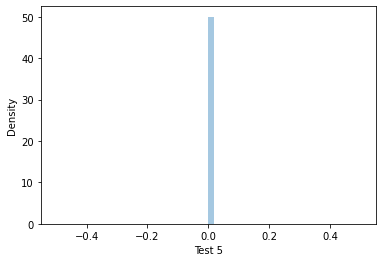

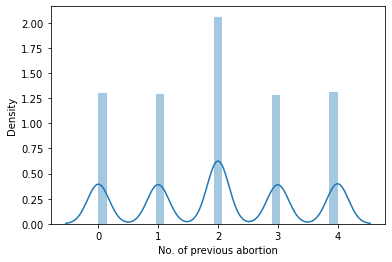

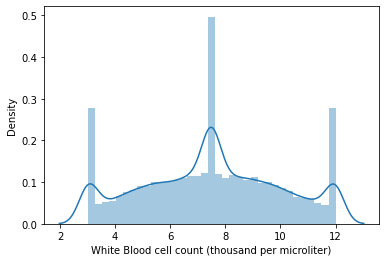

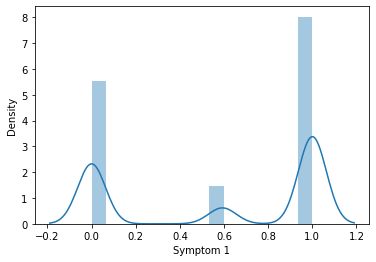

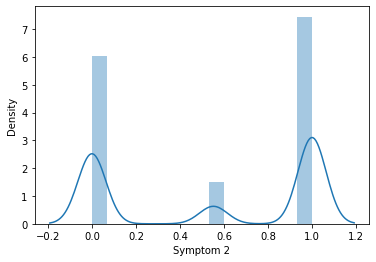

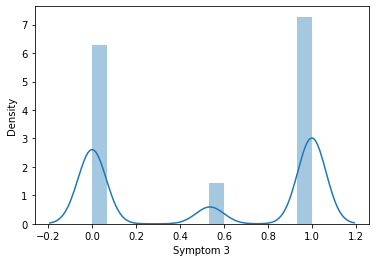

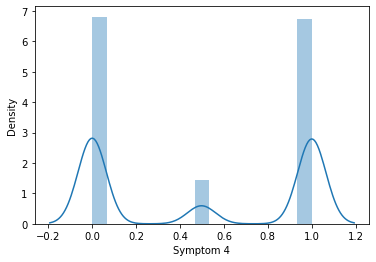

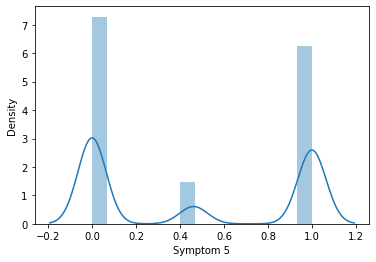

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
for i, col in enumerate(df_num.columns):
    plt.figure(i)
    ax = sns.distplot(df[col])

In [16]:
for i, col in enumerate(df_cat.columns):
    plt.figure(i)
    ax = sns.barplot(x=col, y="Genetic Disorder", data=df_cat)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 432x288 with 0 Axes>

In [17]:
df_merged = pd.concat([df_num, df_cat], axis=1)

this is the current col

Patient Age
<bound method NDFrame.head of 0         2.0
1         4.0
2         6.0
3        12.0
4        11.0
         ... 
22078     4.0
22079     8.0
22080     8.0
22081     7.0
22082    11.0
Name: Patient Age, Length: 22083, dtype: float64>


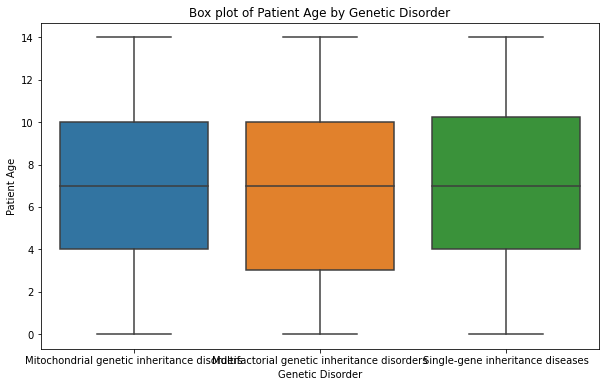

this is the current col

Blood cell count (mcL)
<bound method NDFrame.head of 0        4.760603
1        4.910669
2        4.893297
3        4.705280
4        4.720703
           ...   
22078    5.258298
22079    4.974220
22080    5.186470
22081    4.858543
22082    4.738067
Name: Blood cell count (mcL), Length: 22083, dtype: float64>


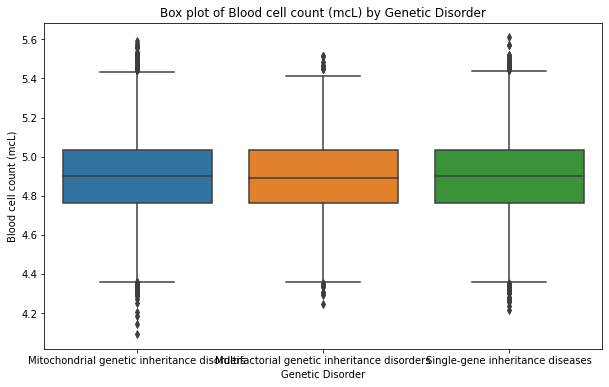

this is the current col

Test 1
<bound method NDFrame.head of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
22078    0.0
22079    0.0
22080    0.0
22081    0.0
22082    0.0
Name: Test 1, Length: 22083, dtype: float64>


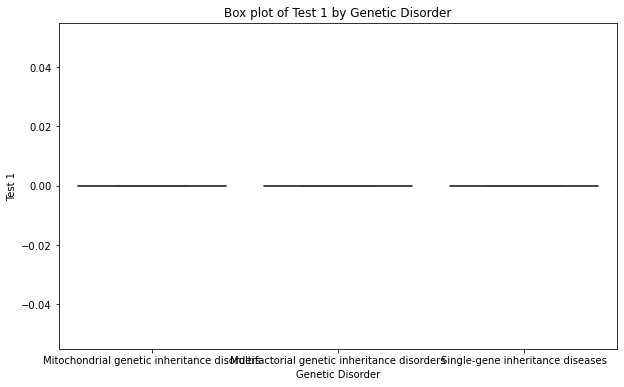

this is the current col

Test 2
<bound method NDFrame.head of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
22078    0.0
22079    0.0
22080    0.0
22081    0.0
22082    0.0
Name: Test 2, Length: 22083, dtype: float64>


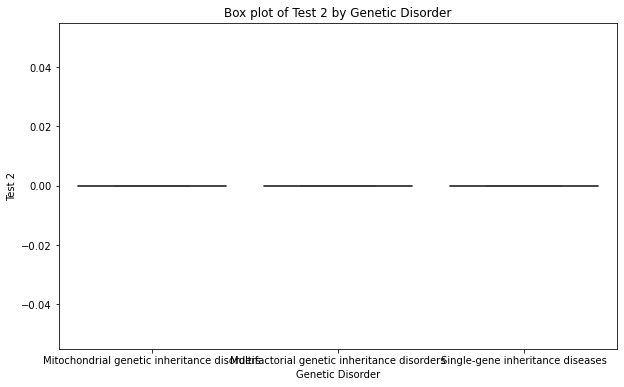

this is the current col

Test 3
<bound method NDFrame.head of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
22078    0.0
22079    0.0
22080    0.0
22081    0.0
22082    0.0
Name: Test 3, Length: 22083, dtype: float64>


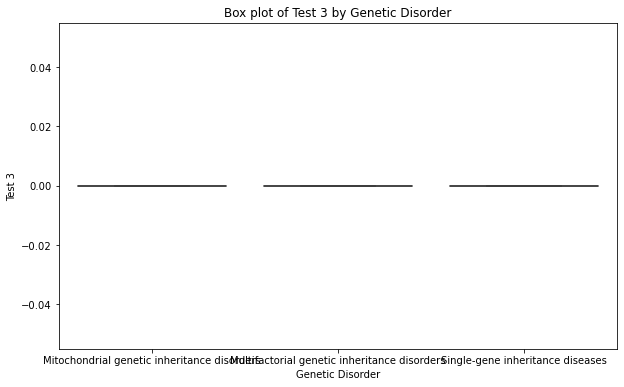

this is the current col

Test 4
<bound method NDFrame.head of 0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
22078    1.0
22079    1.0
22080    1.0
22081    1.0
22082    1.0
Name: Test 4, Length: 22083, dtype: float64>


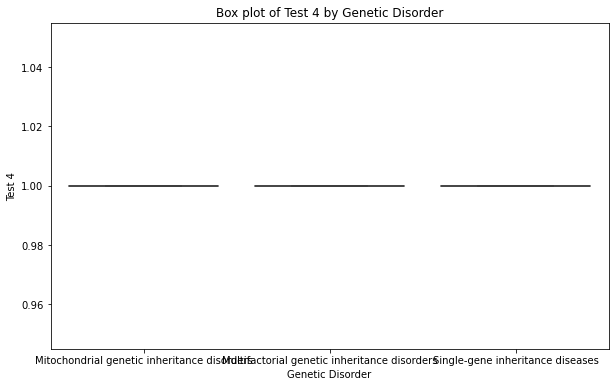

this is the current col

Test 5
<bound method NDFrame.head of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
22078    0.0
22079    0.0
22080    0.0
22081    0.0
22082    0.0
Name: Test 5, Length: 22083, dtype: float64>


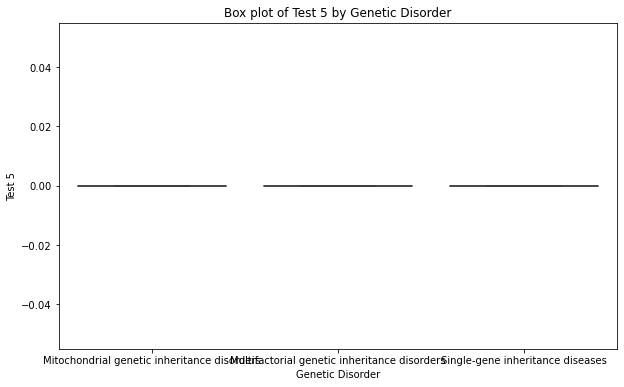

this is the current col

No. of previous abortion
<bound method NDFrame.head of 0        2.003062
1        2.003062
2        4.000000
3        1.000000
4        4.000000
           ...   
22078    3.000000
22079    2.000000
22080    2.000000
22081    1.000000
22082    4.000000
Name: No. of previous abortion, Length: 22083, dtype: float64>


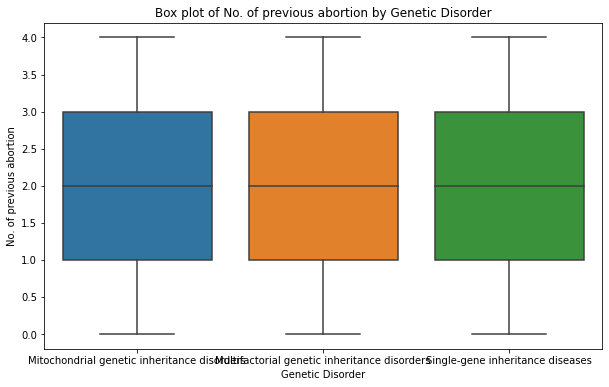

this is the current col

White Blood cell count (thousand per microliter)
<bound method NDFrame.head of 0         9.857562
1         5.522560
2         7.486224
3         7.919321
4         4.098210
           ...    
22078     6.584811
22079     7.041556
22080     7.715464
22081     8.437670
22082    11.188371
Name: White Blood cell count (thousand per microliter), Length: 22083, dtype: float64>


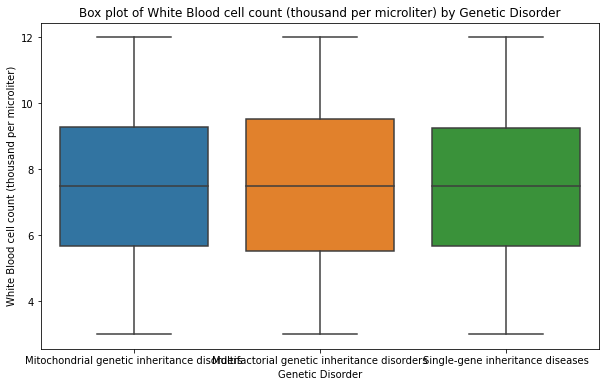

this is the current col

Symptom 1
<bound method NDFrame.head of 0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
22078    0.0
22079    1.0
22080    0.0
22081    1.0
22082    1.0
Name: Symptom 1, Length: 22083, dtype: float64>


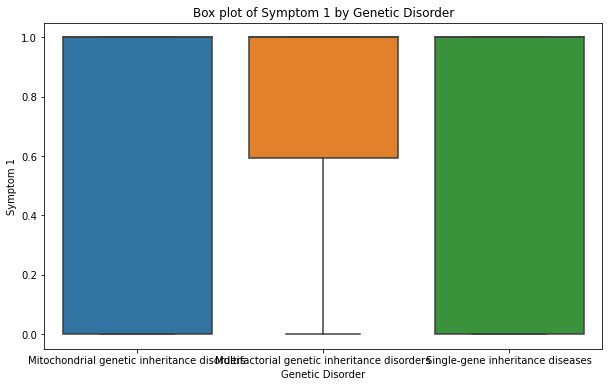

this is the current col

Symptom 2
<bound method NDFrame.head of 0        1.000000
1        0.551886
2        1.000000
3        0.000000
4        0.000000
           ...   
22078    0.000000
22079    1.000000
22080    0.000000
22081    1.000000
22082    0.000000
Name: Symptom 2, Length: 22083, dtype: float64>


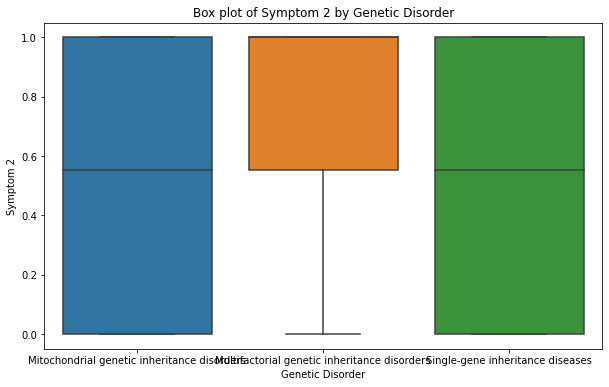

this is the current col

Symptom 3
<bound method NDFrame.head of 0        1.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
22078    1.0
22079    1.0
22080    0.0
22081    1.0
22082    1.0
Name: Symptom 3, Length: 22083, dtype: float64>


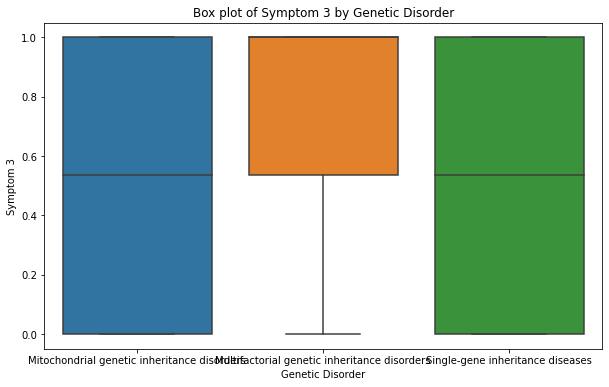

this is the current col

Symptom 4
<bound method NDFrame.head of 0        1.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
22078    0.0
22079    1.0
22080    1.0
22081    0.0
22082    1.0
Name: Symptom 4, Length: 22083, dtype: float64>


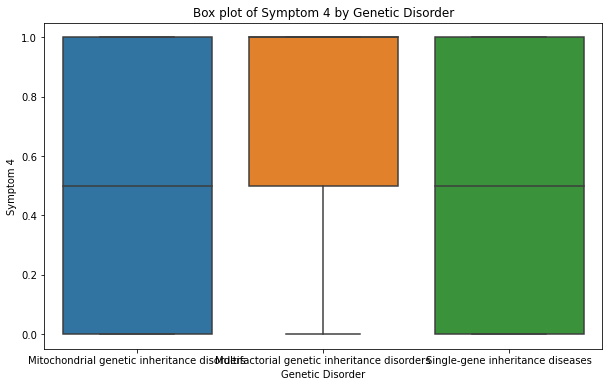

this is the current col

Symptom 5
<bound method NDFrame.head of 0        1.000000
1        0.000000
2        1.000000
3        0.000000
4        0.461917
           ...   
22078    0.000000
22079    0.000000
22080    0.461917
22081    0.000000
22082    1.000000
Name: Symptom 5, Length: 22083, dtype: float64>


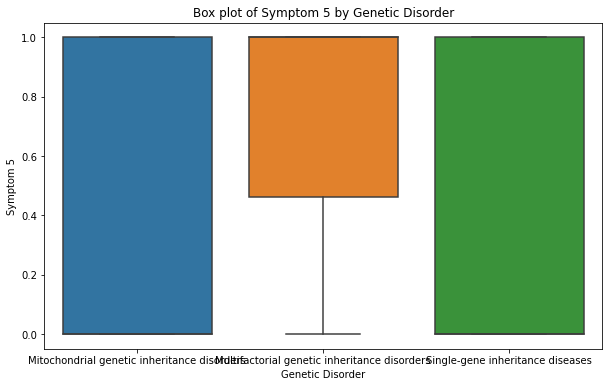

this is the current col

Genes in mother's side
<bound method NDFrame.head of 0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
22078    Yes
22079     No
22080    Yes
22081    Yes
22082    Yes
Name: Genes in mother's side, Length: 22083, dtype: object>


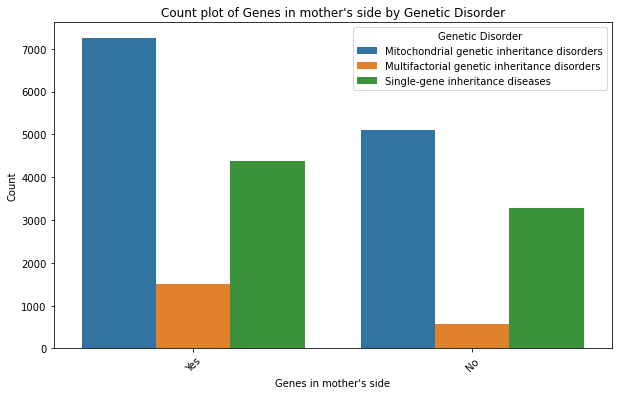

this is the current col

Inherited from father
<bound method NDFrame.head of 0         No
1        Yes
2         No
3         No
4         No
        ... 
22078    Yes
22079    Yes
22080     No
22081     No
22082     No
Name: Inherited from father, Length: 22083, dtype: object>


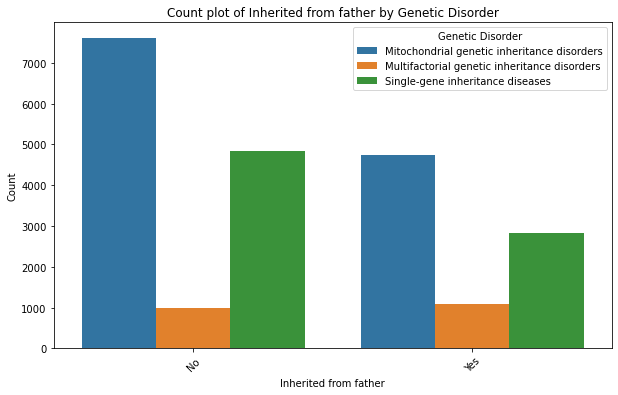

this is the current col

Maternal gene
<bound method NDFrame.head of 0        Yes
1         No
2         No
3        Yes
4        Yes
        ... 
22078    Yes
22079     No
22080    Yes
22081    Yes
22082     No
Name: Maternal gene, Length: 22083, dtype: object>


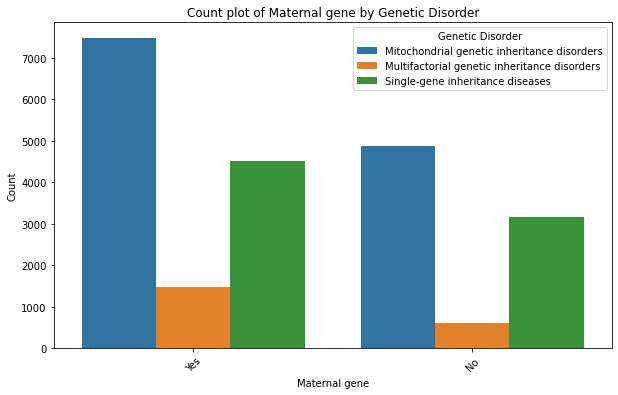

this is the current col

Paternal gene
<bound method NDFrame.head of 0         No
1         No
2         No
3         No
4        Yes
        ... 
22078     No
22079    Yes
22080     No
22081    Yes
22082     No
Name: Paternal gene, Length: 22083, dtype: object>


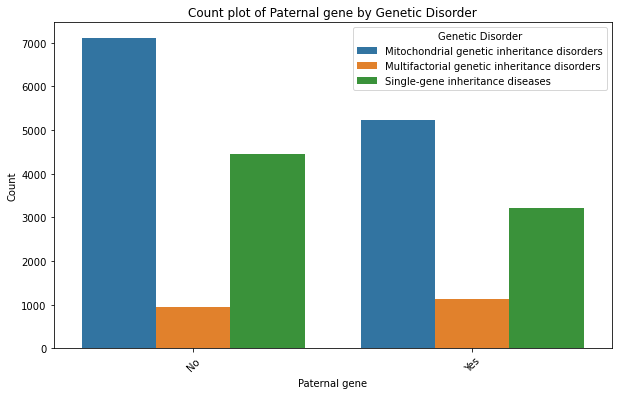

this is the current col

Respiratory Rate (breaths/min)
<bound method NDFrame.head of 0        Normal (30-60)
1             Tachypnea
2        Normal (30-60)
3             Tachypnea
4             Tachypnea
              ...      
22078    Normal (30-60)
22079    Normal (30-60)
22080         Tachypnea
22081         Tachypnea
22082    Normal (30-60)
Name: Respiratory Rate (breaths/min), Length: 22083, dtype: object>


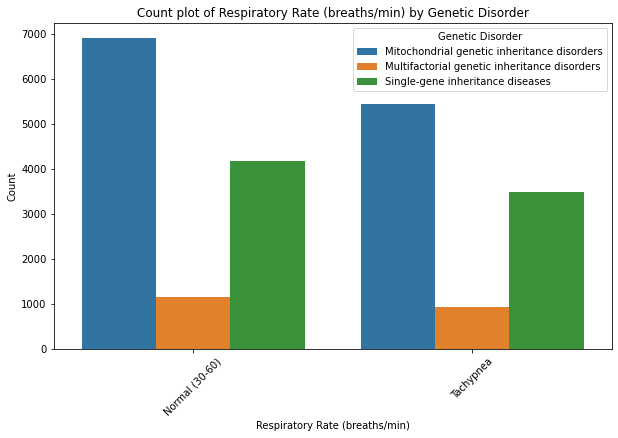

this is the current col

Heart Rate (rates/min
<bound method NDFrame.head of 0             Normal
1             Normal
2        Tachycardia
3             Normal
4        Tachycardia
            ...     
22078    Tachycardia
22079         Normal
22080         Normal
22081    Tachycardia
22082         Normal
Name: Heart Rate (rates/min, Length: 22083, dtype: object>


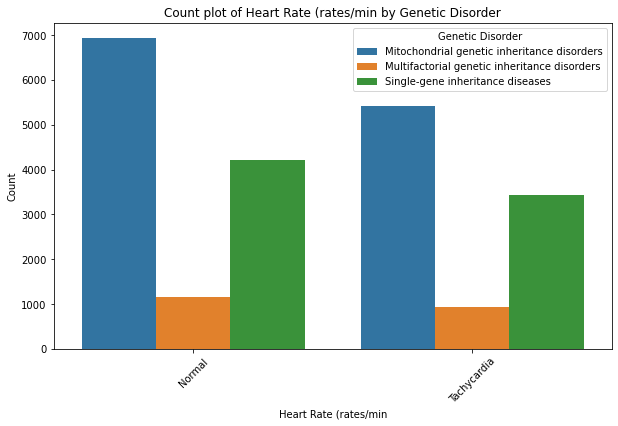

this is the current col

Follow-up
<bound method NDFrame.head of 0        High
1        High
2         Low
3        High
4         Low
         ... 
22078    High
22079    High
22080    High
22081    High
22082    High
Name: Follow-up, Length: 22083, dtype: object>


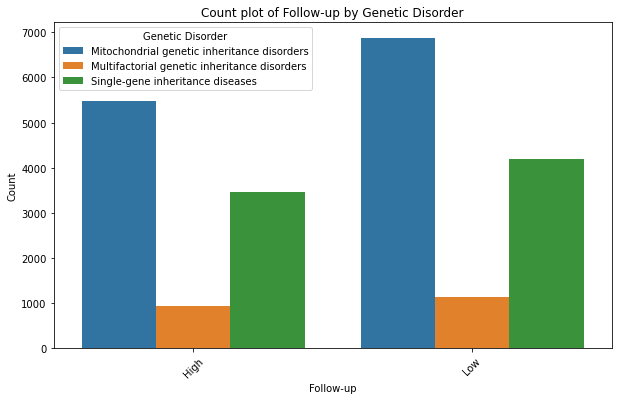

this is the current col

Gender
<bound method NDFrame.head of 0        Ambiguous
1        Ambiguous
2        Ambiguous
3             Male
4             Male
           ...    
22078       Female
22079    Ambiguous
22080         Male
22081         Male
22082       Female
Name: Gender, Length: 22083, dtype: object>


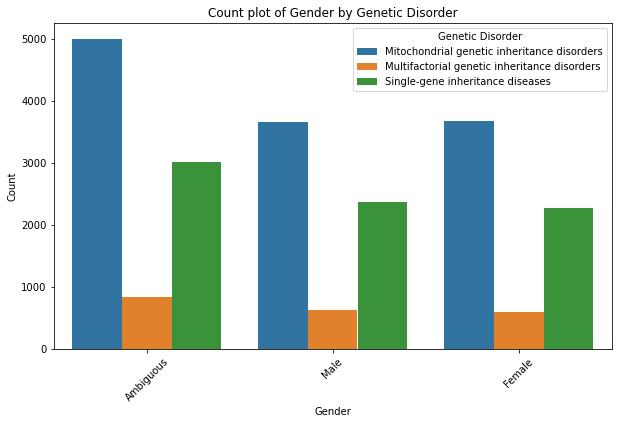

this is the current col

Birth asphyxia
<bound method NDFrame.head of 0                  Yes
1                   No
2            No record
3        Not available
4        Not available
             ...      
22078               No
22079               No
22080               No
22081        No record
22082              Yes
Name: Birth asphyxia, Length: 22083, dtype: object>


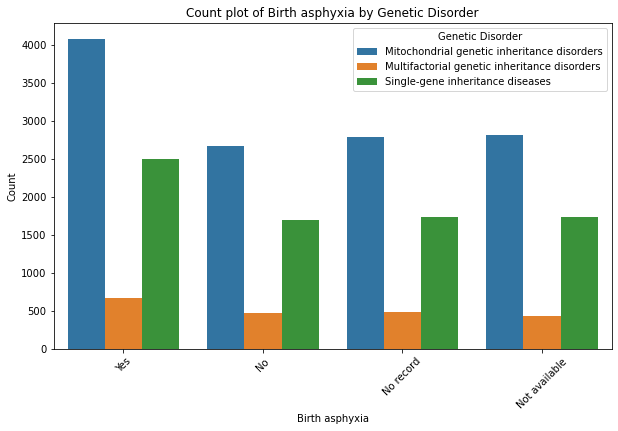

this is the current col

Autopsy shows birth defect (if applicable)
<bound method NDFrame.head of 0        Not applicable
1                  None
2        Not applicable
3                    No
4        Not applicable
              ...      
22078                No
22079    Not applicable
22080              None
22081    Not applicable
22082              None
Name: Autopsy shows birth defect (if applicable), Length: 22083, dtype: object>


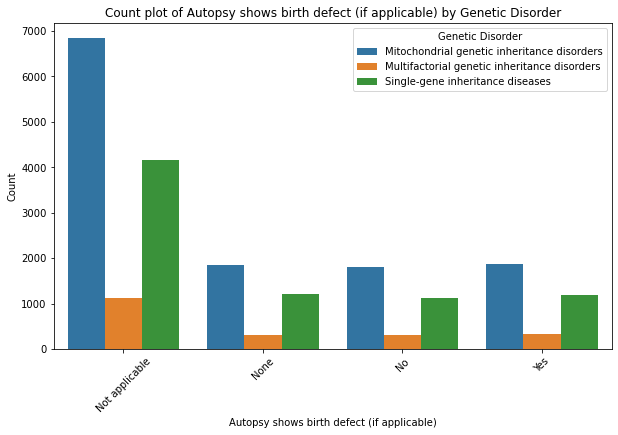

this is the current col

Folic acid details (peri-conceptional)
<bound method NDFrame.head of 0         No
1        Yes
2        Yes
3         No
4         No
        ... 
22078    Yes
22079    Yes
22080     No
22081    Yes
22082    Yes
Name: Folic acid details (peri-conceptional), Length: 22083, dtype: object>


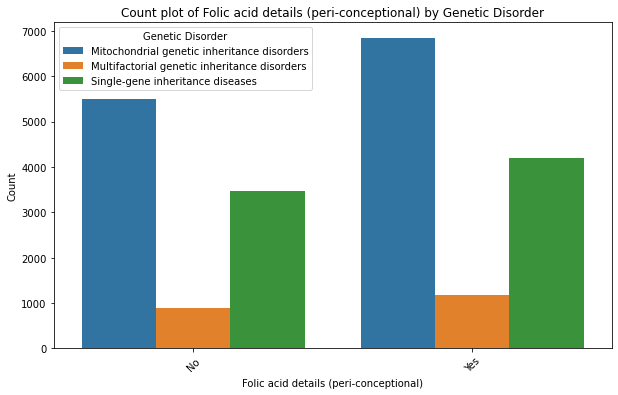

this is the current col

H/O serious maternal illness
<bound method NDFrame.head of 0         No
1        Yes
2         No
3        Yes
4        Yes
        ... 
22078     No
22079    Yes
22080     No
22081    Yes
22082    Yes
Name: H/O serious maternal illness, Length: 22083, dtype: object>


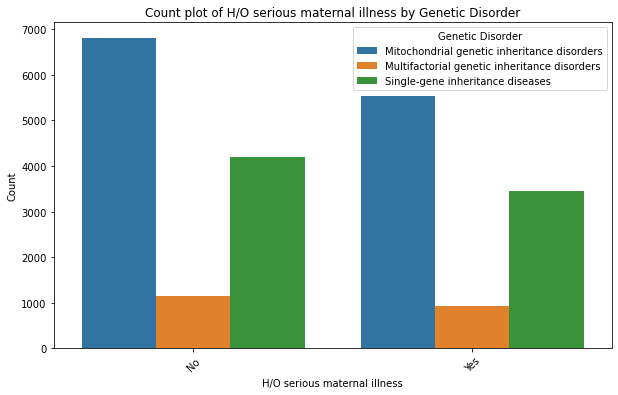

this is the current col

H/O radiation exposure (x-ray)
<bound method NDFrame.head of 0                    No
1        Not applicable
2                   Yes
3                     -
4                     -
              ...      
22078    Not applicable
22079                No
22080    Not applicable
22081                 -
22082    Not applicable
Name: H/O radiation exposure (x-ray), Length: 22083, dtype: object>


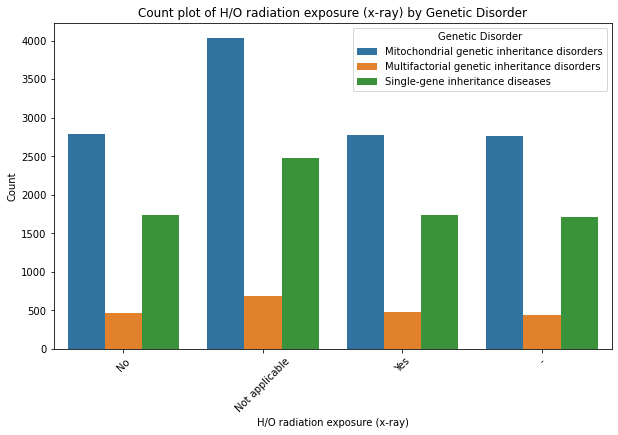

this is the current col

H/O substance abuse
<bound method NDFrame.head of 0                    No
1        Not applicable
2                     -
3        Not applicable
4        Not applicable
              ...      
22078                No
22079                 -
22080                No
22081               Yes
22082                No
Name: H/O substance abuse, Length: 22083, dtype: object>


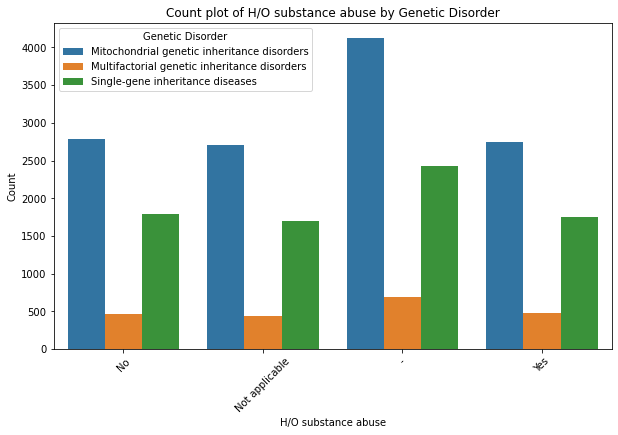

this is the current col

Assisted conception IVF/ART
<bound method NDFrame.head of 0         No
1         No
2        Yes
3        Yes
4        Yes
        ... 
22078    Yes
22079    Yes
22080     No
22081    Yes
22082    Yes
Name: Assisted conception IVF/ART, Length: 22083, dtype: object>


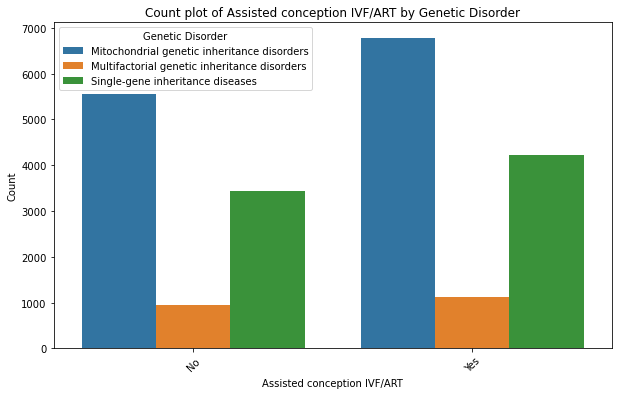

this is the current col

History of anomalies in previous pregnancies
<bound method NDFrame.head of 0        Yes
1        Yes
2        Yes
3        Yes
4         No
        ... 
22078     No
22079     No
22080     No
22081     No
22082    Yes
Name: History of anomalies in previous pregnancies, Length: 22083, dtype: object>


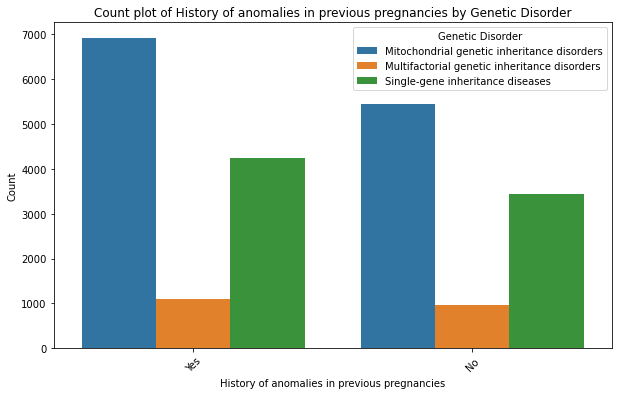

this is the current col

Birth defects
<bound method NDFrame.head of 0        Singular
1        Multiple
2        Singular
3        Singular
4        Multiple
           ...   
22078    Multiple
22079    Multiple
22080    Singular
22081    Multiple
22082    Singular
Name: Birth defects, Length: 22083, dtype: object>


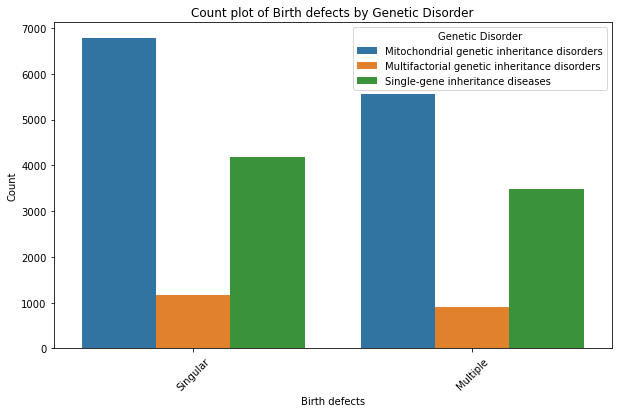

this is the current col

Blood test result
<bound method NDFrame.head of 0        slightly abnormal
1                   normal
2                   normal
3             inconclusive
4        slightly abnormal
               ...        
22078         inconclusive
22079         inconclusive
22080               normal
22081             abnormal
22082               normal
Name: Blood test result, Length: 22083, dtype: object>


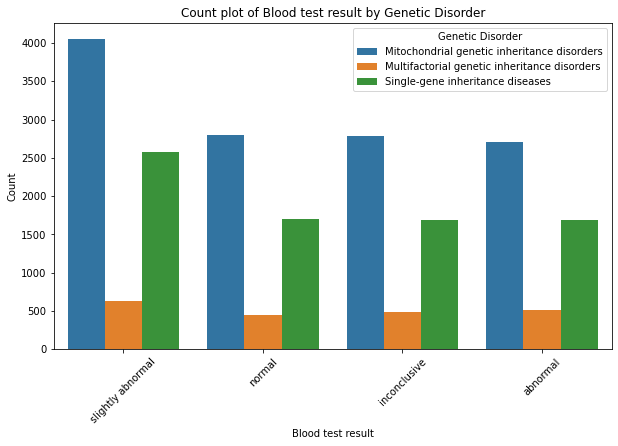

this is the current col

Disorder Subclass
<bound method NDFrame.head of 0        Leber's hereditary optic neuropathy
1                            Cystic fibrosis
2                                   Diabetes
3                             Leigh syndrome
4                                     Cancer
                        ...                 
22078                         Leigh syndrome
22079                               Diabetes
22080                 Mitochondrial myopathy
22081                         Leigh syndrome
22082                               Diabetes
Name: Disorder Subclass, Length: 22083, dtype: object>


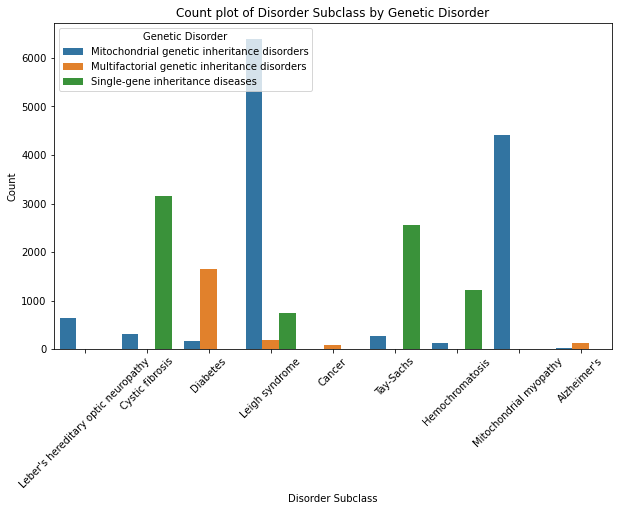

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing both numerical and categorical fields

# Get the list of column names excluding 'Genetic Disorder'
columns_to_plot = [col for col in df_merged.columns if col != 'Genetic Disorder']

# Iterate over each column
for col in columns_to_plot:
    # Check if the column contains numerical data
    print("this is the current col\n")
    print(col)
    print(df[col].head)
    if df[col].dtype in ['int64', 'float64']:
        # Create a box plot for numerical fields
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Genetic Disorder', y=col, data=df)
        plt.title(f'Box plot of {col} by Genetic Disorder')
        plt.xlabel('Genetic Disorder')
        plt.ylabel(col)
        plt.show()
    else:
        # Create a count plot for categorical fields
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='Genetic Disorder', data=df)
        plt.title(f'Count plot of {col} by Genetic Disorder')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
